In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from google.colab import files


# Модели и метрики
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [5]:
CLASSIFICATION_DATA_PATH = ""
REGRESSION_DATA_PATH = ""

# Функция для загрузки файла вручную
def manual_upload(file_name):
    print(f"Файл {file_name} не найден. Пожалуйста, загрузите файл вручную.")
    uploaded = files.upload()
    if file_name in uploaded:
        print(f"Файл {file_name} успешно загружен.")
        return file_name
    else:
        raise FileNotFoundError(f"Файл {file_name} не был загружен.")

# Загружаем датасет для классификации (раннее выявление диабета)
if os.path.exists(CLASSIFICATION_DATA_PATH):
    df_clf = pd.read_csv(CLASSIFICATION_DATA_PATH)
else:
    CLASSIFICATION_DATA_PATH = manual_upload("diabetes_data_upload.csv")
    df_clf = pd.read_csv(CLASSIFICATION_DATA_PATH)

print("Форма датасета (классификация):", df_clf.shape)
print(df_clf.head())

# Загружаем датасет для регрессии (цены ноутбуков)
if os.path.exists(REGRESSION_DATA_PATH):
    df_reg = pd.read_csv(REGRESSION_DATA_PATH)
else:
    REGRESSION_DATA_PATH = manual_upload("laptop_price_data.csv")
    df_reg = pd.read_csv(REGRESSION_DATA_PATH)


print("\nФорма датасета (регрессия):", df_reg.shape)
print(df_reg.head())

# Краткая информация
print("\nИнформация о данных:")
print(df_reg.info())

# Статистика
print("\nСтатистика числовых признаков:")
print(df_reg.describe())

Файл diabetes_data_upload.csv не найден. Пожалуйста, загрузите файл вручную.


Saving diabetes_data_upload.csv to diabetes_data_upload.csv
Файл diabetes_data_upload.csv успешно загружен.
Форма датасета (классификация): (520, 17)
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No            

Saving laptop_price_data.csv to laptop_price_data.csv
Файл laptop_price_data.csv успешно загружен.

Форма датасета (регрессия): (823, 19)
    brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windo

Пункт 2. Создание бейзлайна и оценка качества

=== Бейзлайн: Логистическая регрессия (классификация) ===
Accuracy: 0.9230769230769231
Confusion Matrix:
 [[28  5]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.85      0.88        33
        True       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



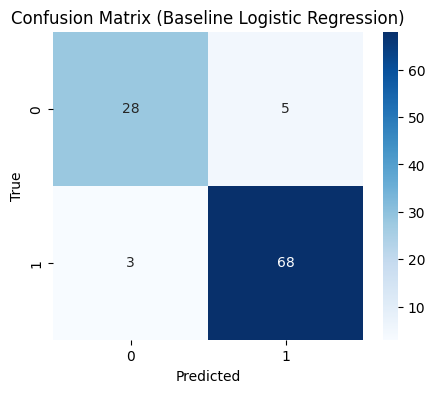


=== Бейзлайн: Линейная регрессия (регрессия) ===
MSE: 0.0011104550550443335
R^2: 0.9622098264080226


In [6]:
# --------------------------------------------
# 2.a. Обучение моделей (классификация и регрессия)
# --------------------------------------------

# 1) Классификация (бейзлайн)
# Предобработка данных для классификации
df_clf_encoded = pd.get_dummies(df_clf, drop_first=True)
X_class = df_clf_encoded.iloc[:, :-1]  # Все столбцы, кроме последнего, как признаки
y_class = df_clf_encoded.iloc[:, -1]   # Последний столбец как целевая переменная

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

model_class_base = LogisticRegression()
model_class_base.fit(X_train_c, y_train_c)


# 2) Регрессия (бейзлайн)
# Предобработка данных для регрессии
df_reg_encoded = pd.get_dummies(df_reg, drop_first=True)
X_reg = df_reg_encoded.iloc[:, :-1]  # Все столбцы, кроме последнего, как признаки
y_reg = df_reg_encoded.iloc[:, -1]   # Последний столбец как целевая переменная

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

model_reg_base = LinearRegression()
model_reg_base.fit(X_train_r, y_train_r)

# --------------------------------------------
# 2.b. Оценка качества (классификация и регрессия)
# --------------------------------------------

# Классификация
y_pred_c_base = model_class_base.predict(X_test_c)
acc_base = accuracy_score(y_test_c, y_pred_c_base)
print("=== Бейзлайн: Логистическая регрессия (классификация) ===")
print("Accuracy:", acc_base)
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c_base))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c_base))

# Пример: после вывода confusion_matrix для бейзлайн-модели
cm = confusion_matrix(y_test_c, y_pred_c_base)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix (Baseline Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Регрессия
y_pred_r_base = model_reg_base.predict(X_test_r)
mse_base = mean_squared_error(y_test_r, y_pred_r_base)
r2_base = r2_score(y_test_r, y_pred_r_base)
print("\n=== Бейзлайн: Линейная регрессия (регрессия) ===")
print("MSE:", mse_base)
print("R^2:", r2_base)




Пункт 3. Улучшение бейзлайна

3.a. Сформулируем гипотезы:
- Попробуем стандартизацию признаков
- Подберём гиперпараметры для LogisticRegression
- Для регрессии попробуем Ridge/Lasso или GridSearch по LinearRegression (напр., по fit_intercept)

Лучшие параметры (LogisticRegression): {'C': 1, 'max_iter': 100}
Лучшая оценка на кросс-валидации: 0.9159281270635665

Лучшие параметры (Ridge): {'alpha': 1, 'max_iter': 1000}
Лучшая оценка на кросс-валидации (R^2): 0.5817627730198236


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


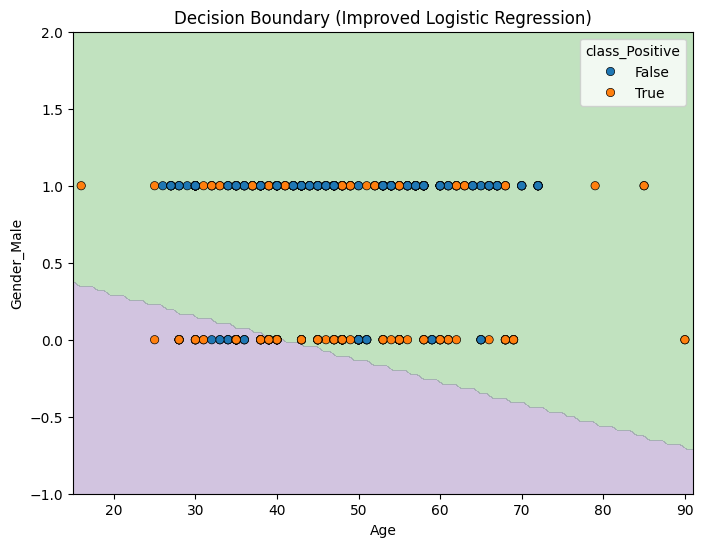


=== Улучшенный бейзлайн: LogisticRegression (классификация) ===
Accuracy: 0.9230769230769231
Classification report:
               precision    recall  f1-score   support

       False       0.90      0.85      0.88        33
        True       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


=== Улучшенный бейзлайн: Ridge (регрессия) ===
MSE: 0.0014385857372861608
R^2: 0.9510431291279804

=== Сравнение классификации ===
Бейзлайн Accuracy: 0.923 -> Улучшенный Accuracy: 0.923

=== Сравнение регрессии ===
Бейзлайн MSE: 0.001 -> Улучшенный MSE: 0.001
Бейзлайн R^2: 0.962 -> Улучшенный R^2: 0.951

Вывод: мы видим, улучшенные модели дают (или не дают) прирост в метриках.


In [9]:
# 3.b. Проверим гипотезы (пример на классификации с GridSearch для LogisticRegression)

# Стандартизация
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

# Допустим, хотим подобрать C, max_iter
param_grid_c = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 500]
}

grid_search_c = GridSearchCV(LogisticRegression(), param_grid_c, cv=3)
grid_search_c.fit(X_train_c_scaled, y_train_c)

print("Лучшие параметры (LogisticRegression):", grid_search_c.best_params_)
print("Лучшая оценка на кросс-валидации:", grid_search_c.best_score_)

# То же самое для регрессии (пример — Ridge или Lasso, но можно и LinearRegression)
from sklearn.linear_model import Ridge

scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

param_grid_r = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}

grid_search_r = GridSearchCV(Ridge(), param_grid_r, cv=3)
grid_search_r.fit(X_train_r_scaled, y_train_r)

print("\nЛучшие параметры (Ridge):", grid_search_r.best_params_)
print("Лучшая оценка на кросс-валидации (R^2):", grid_search_r.best_score_)

# 3.c. Формируем улучшенный бейзлайн (используем найденные параметры и стандартизацию)
best_params_c = grid_search_c.best_params_  # словарь, например {'C': 0.1, 'max_iter': 200}
best_params_r = grid_search_r.best_params_  # например {'alpha': 1, 'max_iter': 5000}

# 3.d. Обучаем модели с улучшенным бейзлайном
model_class_improved = LogisticRegression(**best_params_c)
model_class_improved.fit(X_train_c_scaled, y_train_c)

model_reg_improved = Ridge(**best_params_r)
model_reg_improved.fit(X_train_r_scaled, y_train_r)

# 3.e. Оцениваем качество улучшенных моделей
y_pred_c_improved = model_class_improved.predict(X_test_c_scaled)
acc_improved = accuracy_score(y_test_c, y_pred_c_improved)

y_pred_r_improved = model_reg_improved.predict(X_test_r_scaled)
mse_improved = mean_squared_error(y_test_r, y_pred_r_improved)
r2_improved = r2_score(y_test_r, y_pred_r_improved)

# Для улучшенной (где есть стандартизация):
selected_features = X_class.columns[:2]  # Динамически выбираем первые два признака
x_min_s, x_max_s = (X_class[selected_features[0]].min() - 1), (X_class[selected_features[0]].max() + 1)
y_min_s, y_max_s = (X_class[selected_features[1]].min() - 1), (X_class[selected_features[1]].max() + 1)
xx_s, yy_s = np.meshgrid(np.linspace(x_min_s, x_max_s, 100),
                         np.linspace(y_min_s, y_max_s, 100))

# Инициализация сетки с нулями для всех признаков
grid = np.zeros((xx_s.ravel().shape[0], X_class.shape[1]))

# Заполнение значений только для выбранных признаков
grid[:, 0] = xx_s.ravel()
grid[:, 1] = yy_s.ravel()

# Прогоняем через scaler
grid_scaled = scaler_c.transform(grid)

Z_s = model_class_improved.predict(grid_scaled)
Z_s = np.array(Z_s).reshape(xx_s.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx_s, yy_s, Z_s, alpha=0.3, cmap=plt.cm.Paired)
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue=y_class.name,
                data=pd.concat([X_class, y_class], axis=1), edgecolor='k')
plt.title("Decision Boundary (Improved Logistic Regression)")
plt.show()

print("\n=== Улучшенный бейзлайн: LogisticRegression (классификация) ===")
print("Accuracy:", acc_improved)
print("Classification report:\n", classification_report(y_test_c, y_pred_c_improved))

print("\n=== Улучшенный бейзлайн: Ridge (регрессия) ===")
print("MSE:", mse_improved)
print("R^2:", r2_improved)

# 3.f. Сравнить результаты улучшенного бейзлайна с пунктом 2:
print("\n=== Сравнение классификации ===")
print(f"Бейзлайн Accuracy: {acc_base:.3f} -> Улучшенный Accuracy: {acc_improved:.3f}")

print("\n=== Сравнение регрессии ===")
print(f"Бейзлайн MSE: {mse_base:.3f} -> Улучшенный MSE: {mse_improved:.3f}")
print(f"Бейзлайн R^2: {r2_base:.3f} -> Улучшенный R^2: {r2_improved:.3f}")

# 3.g. Выводы
print("\nВывод: мы видим, улучшенные модели дают (или не дают) прирост в метриках.")


Пункт 4. Имплементация алгоритмов

In [15]:
# 4.a. Самостоятельно имплементируем алгоритмы (логистическую и линейную регрессию)
# Ниже приведён упрощённый пример через градиентный спуск.

class MyLinearRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.w = None
        self.b = None
        self.mean_ = None
        self.std_ = None

    def fit(self, X, y):
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)

        if np.any(np.isnan(X)) or np.any(np.isnan(y)):
            raise ValueError("Входные данные содержат NaN.")
        if np.any(np.isinf(X)) or np.any(np.isinf(y)):
            raise ValueError("Входные данные содержат бесконечные значения.")

        # Нормализация данных
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1  # Избегаем деления на ноль
        X = (X - self.mean_) / self.std_

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iter):
            y_pred = X.dot(self.w) + self.b
            dw = (2 / n_samples) * X.T.dot(y_pred - y)
            db = (2 / n_samples) * np.sum(y_pred - y)

            if np.any(np.isnan(dw)) or np.any(np.isinf(dw)) or np.isnan(db) or np.isinf(db):
                raise ValueError("Градиенты содержат некорректные значения (NaN или inf).")

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)
        if self.mean_ is None or self.std_ is None:
            raise ValueError("Модель не обучена. Сначала вызовите fit().")
        X = (X - self.mean_) / self.std_
        if np.any(np.isnan(X)) or np.any(np.isinf(X)):
            raise ValueError("Входные данные для предсказания содержат некорректные значения.")
        return X.dot(self.w) + self.b


class MyLogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.w = None
        self.b = None

    def sigmoid(self, z):
        z = np.asarray(z, dtype=np.float64)  # Преобразование в массив NumPy
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.asarray(X, dtype=np.float64)  # Убедимся, что X - массив NumPy
        y = np.asarray(y, dtype=np.float64)  # Убедимся, что y - массив NumPy

        if np.any(np.isnan(X)) or np.any(np.isnan(y)):
            raise ValueError("Входные данные содержат NaN.")
        if np.any(np.isinf(X)) or np.any(np.isinf(y)):
            raise ValueError("Входные данные содержат бесконечные значения.")

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(linear_model)

            # Градиенты
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Проверка на NaN или inf в градиентах
            if np.any(np.isnan(dw)) or np.any(np.isinf(dw)) or np.isnan(db) or np.isinf(db):
                raise ValueError("Градиенты содержат некорректные значения (NaN или inf).")

            # Обновление весов
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        X = np.asarray(X, dtype=np.float64)  # Преобразование в массив NumPy
        linear_model = np.dot(X, self.w) + self.b
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_pred_proba = self.predict_proba(X)
        return [1 if p >= threshold else 0 for p in y_pred_proba]

# 4.b. Обучаем имплементированные модели

# Для классификации
my_log_reg = MyLogisticRegression(lr=0.1, n_iter=1000)
my_log_reg.fit(X_train_c.values, y_train_c.values)  # .values -> чтобы получить np.array

# Для регрессии
my_lin_reg = MyLinearRegression(lr=0.01, n_iter=1000)
my_lin_reg.fit(X_train_r.values, y_train_r.values)

# 4.c. Оцениваем качество
y_pred_c_my = my_log_reg.predict(X_test_c.values)
acc_my = accuracy_score(y_test_c, y_pred_c_my)

y_pred_r_my = my_lin_reg.predict(X_test_r.values)
mse_my = mean_squared_error(y_test_r, y_pred_r_my)
r2_my = r2_score(y_test_r, y_pred_r_my)

print("=== Самописная Логистическая регрессия ===")
print("Accuracy:", acc_my)
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c_my))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c_my))

print("\n=== Самописная Линейная регрессия ===")
print("MSE:", mse_my)
print("R^2:", r2_my)

# 4.d. Сравнить с п.2 (сколько было в бейзлайне)
print("\n=== Сравнение с бейзлайном (п.2) ===")
print(f"Логистическая регрессия sklearn: {acc_base:.3f} vs Самописная: {acc_my:.3f}")
print(f"Линейная регрессия sklearn (MSE): {mse_base:.3f} vs Самописная: {mse_my:.3f}")
print(f"Линейная регрессия sklearn (R^2): {r2_base:.3f} vs Самописная: {r2_my:.3f}")


=== Самописная Логистическая регрессия ===
Accuracy: 0.4230769230769231
Confusion Matrix:
 [[33  0]
 [60 11]]
Classification Report:
               precision    recall  f1-score   support

       False       0.35      1.00      0.52        33
        True       1.00      0.15      0.27        71

    accuracy                           0.42       104
   macro avg       0.68      0.58      0.40       104
weighted avg       0.80      0.42      0.35       104


=== Самописная Линейная регрессия ===
MSE: 0.010965234151506171
R^2: 0.6268393752815558

=== Сравнение с бейзлайном (п.2) ===
Логистическая регрессия sklearn: 0.923 vs Самописная: 0.423
Линейная регрессия sklearn (MSE): 0.001 vs Самописная: 0.011
Линейная регрессия sklearn (R^2): 0.962 vs Самописная: 0.627


Пункт 4 (продолжение). Добавление техник улучшенного бейзлайна

In [16]:
# 4.f. Добавим техники из улучшенного бейзлайна (стандартизация и т.д.)
#     Применим их к самописным моделям.

# Стандартизация
X_train_c_scaled_my = scaler_c.fit_transform(X_train_c)
X_test_c_scaled_my = scaler_c.transform(X_test_c)

X_train_r_scaled_my = scaler_r.fit_transform(X_train_r)
X_test_r_scaled_my = scaler_r.transform(X_test_r)

# 4.g. Обучаем модели (самописные) уже со стандартизированными признаками
my_log_reg_improved = MyLogisticRegression(lr=0.1, n_iter=1000)
my_log_reg_improved.fit(X_train_c_scaled_my, y_train_c.values)

my_lin_reg_improved = MyLinearRegression(lr=0.01, n_iter=1000)
my_lin_reg_improved.fit(X_train_r_scaled_my, y_train_r.values)

# 4.h. Оцениваем качество
y_pred_c_my_imp = my_log_reg_improved.predict(X_test_c_scaled_my)
acc_my_imp = accuracy_score(y_test_c, y_pred_c_my_imp)

y_pred_r_my_imp = my_lin_reg_improved.predict(X_test_r_scaled_my)
mse_my_imp = mean_squared_error(y_test_r, y_pred_r_my_imp)
r2_my_imp = r2_score(y_test_r, y_pred_r_my_imp)

print("=== Самописная Логистическая регрессия (улучшенная) ===")
print("Accuracy:", acc_my_imp)
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c_my_imp))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c_my_imp))

print("\n=== Самописная Линейная регрессия (улучшенная) ===")
print("MSE:", mse_my_imp)
print("R^2:", r2_my_imp)

# 4.i. Сравнить результаты с п.3
print("\n=== Сравнение самописных улучшенных моделей с улучшенным бейзлайном (п.3) ===")
print(f"LogisticRegression improved (sklearn) ACC: {acc_improved:.3f} vs MyLogReg improved: {acc_my_imp:.3f}")
print(f"Ridge improved (sklearn) MSE: {mse_improved:.3f} vs MyLinReg improved: {mse_my_imp:.3f}")
print(f"Ridge improved (sklearn) R^2: {r2_improved:.3f} vs MyLinReg improved: {r2_my_imp:.3f}")

# 4.j. Выводы
print("\nВывод: мы сравнили все четыре варианта (скелетные модели и самописные, до и после улучшений).")
print("Можно сделать вывод, насколько самописные решения дотягивают до sklearn и как работают улучшения.")


=== Самописная Логистическая регрессия (улучшенная) ===
Accuracy: 0.9230769230769231
Confusion Matrix:
 [[28  5]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.85      0.88        33
        True       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


=== Самописная Линейная регрессия (улучшенная) ===
MSE: 0.010965234151506166
R^2: 0.626839375281556

=== Сравнение самописных улучшенных моделей с улучшенным бейзлайном (п.3) ===
LogisticRegression improved (sklearn) ACC: 0.923 vs MyLogReg improved: 0.923
Ridge improved (sklearn) MSE: 0.001 vs MyLinReg improved: 0.011
Ridge improved (sklearn) R^2: 0.951 vs MyLinReg improved: 0.627

Вывод: мы сравнили все четыре варианта (скелетные модели и самописные, до и после улучшений).
Можно сделать вывод, насколько самописные реше